In [ ]:
## dataset link
"""
https://arxiv.org/abs/2402.06698
https://huggingface.co/datasets/Zihan1004/FNSPID/tree/main/Stock_news (5.73gb dataset)
sp500 dataset is attached 
"""

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with tqdm(total=100) as pbar:
    df = pd.read_csv('/content/drive/MyDrive/All_external.csv')
    pbar.update(100)


  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-12-acd66c8c6dc5>:6: DtypeWarning: Columns (2,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/All_external.csv')
100%|██████████| 100/100 [01:32<00:00,  1.08it/s]


In [ ]:
df

,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary
0,2020-06-05 06:30:54 UTC,Stocks That Hit 52-Week Highs On Friday,A,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-03 06:45:20 UTC,Stocks That Hit 52-Week Highs On Wednesday,A,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-05-26 00:30:07 UTC,71 Biggest Movers From Friday,A,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-05-22 08:45:06 UTC,46 Stocks Moving In Friday's Mid-Day Session,A,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-05-22 07:38:59 UTC,B of A Securities Maintains Neutral on Agilent...,A,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13057509,2011-04-19 00:00:00 UTC,Colombian Peso Advances to Six-Month High on H...,NaN,http://www.bloomberg.com/news/2011-04-19/colom...,NaN,B y A n d r e a J a r a m i l l o,Colombia’s peso climbed to a six-\nmonth high ...,NaN,NaN,NaN,NaN
13057510,2011-04-19 00:00:00 UTC,Apple Said to Add Foxconn’s Chimei as Supplier...,NaN,http://www.bloomberg.com/news/2011-04-19/apple...,NaN,B y T i m C u l p a n a n d A d a m ...,Apple Inc. (AAPL) has agreed to add\nFoxconn ...,NaN,NaN,NaN,NaN
13057511,2011-04-19 00:00:00 UTC,"CEZ, Bank Pekao Shares May Move: Central Europ...",NaN,http://www.bloomberg.com/news/2011-04-19/cez-b...,NaN,B y P a w e l K o z l o w s k i,The following is a list of\ncompanies whose sh...,NaN,NaN,NaN,NaN
13057512,2011-04-19 00:00:00 UTC,"Popolare di Milano May Join Intesa, Paschi in ...",NaN,http://www.bloomberg.com/news/2011-04-19/popol...,NaN,B y S o n i a S i r l e t t i,"Banca Popolare di Milano Scrl,\n Italy ’s olde...",NaN,NaN,NaN,NaN


In [ ]:
null_values = df.isnull().sum()
print(null_values)

Date                       0
Article_title              1
Stock_symbol         9804627
Url                      686
Publisher            9030871
Author              11871199
Article             11809202
Lsa_summary         13057514
Luhn_summary        13057514
Textrank_summary    13057514
Lexrank_summary     13057514
dtype: int64


In [ ]:
df.drop(['Stock_symbol','Url','Publisher','Author','Lsa_summary','Luhn_summary','Textrank_summary','Lexrank_summary'], axis=1, inplace=True)

In [ ]:
df['Article'] = df['Article_title'].fillna('') + ' ' + df['Article'].fillna('')
df.drop(columns=['Article_title'], inplace=True)

In [ ]:
news_data = df

In [ ]:
news_data

,Date,Article
0,2020-06-05 06:30:54 UTC,Stocks That Hit 52-Week Highs On Friday
1,2020-06-03 06:45:20 UTC,Stocks That Hit 52-Week Highs On Wednesday
2,2020-05-26 00:30:07 UTC,71 Biggest Movers From Friday
3,2020-05-22 08:45:06 UTC,46 Stocks Moving In Friday's Mid-Day Session
4,2020-05-22 07:38:59 UTC,B of A Securities Maintains Neutral on Agilent...
...,...,...
13057509,2011-04-19 00:00:00 UTC,Colombian Peso Advances to Six-Month High on H...
13057510,2011-04-19 00:00:00 UTC,Apple Said to Add Foxconn’s Chimei as Supplier...
13057511,2011-04-19 00:00:00 UTC,"CEZ, Bank Pekao Shares May Move: Central Europ..."
13057512,2011-04-19 00:00:00 UTC,"Popolare di Milano May Join Intesa, Paschi in ..."


Saving this df to drive

In [ ]:
import pickle

your_variable = news_data
file_path = "your_variable.pkl"
with open(file_path, 'wb') as f:
    pickle.dump(your_variable, f)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


load it

In [4]:
import pickle

file_path = "your_variable.pkl"
with open(file_path, 'rb') as f:
    news_data = pickle.load(f)


Preprocessing text


In [5]:
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found, using CPU instead.")

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

tqdm.pandas()

news_data['preprocessed_text'] = news_data['Article'].progress_apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     /usr3/graduate/kms22/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /usr3/graduate/kms22/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


No GPU found, using CPU instead.


100%|██████████| 13057514/13057514 [2:18:36<00:00, 1570.15it/s] 


In [6]:
news_data

,Date,Article,preprocessed_text
0,2020-06-05 06:30:54 UTC,Stocks That Hit 52-Week Highs On Friday,stock hit week high friday
1,2020-06-03 06:45:20 UTC,Stocks That Hit 52-Week Highs On Wednesday,stock hit week high wednesday
2,2020-05-26 00:30:07 UTC,71 Biggest Movers From Friday,biggest mover friday
3,2020-05-22 08:45:06 UTC,46 Stocks Moving In Friday's Mid-Day Session,stock move friday midday session
4,2020-05-22 07:38:59 UTC,B of A Securities Maintains Neutral on Agilent...,b secur maintain neutral agil technolog rais p...
...,...,...,...
13057509,2011-04-19 00:00:00 UTC,Colombian Peso Advances to Six-Month High on H...,colombian peso advanc sixmonth high higher fdi...
13057510,2011-04-19 00:00:00 UTC,Apple Said to Add Foxconn’s Chimei as Supplier...,appl said add foxconn chimei supplier part ipa...
13057511,2011-04-19 00:00:00 UTC,"CEZ, Bank Pekao Shares May Move: Central Europ...",cez bank pekao share may move central european...
13057512,2011-04-19 00:00:00 UTC,"Popolare di Milano May Join Intesa, Paschi in ...",popolar di milano may join intesa paschi sell ...


In [8]:
import pickle

# Your variable
your_variable = news_data

file_path = "your_variable_1.pkl"
with open(file_path, 'wb') as f:
    pickle.dump(your_variable, f)


In [7]:
import pickle

file_path = "your_variable_1.pkl"

# Load variable from Google Drive
with open(file_path, 'rb') as f:
    news_data = pickle.load(f)


In [8]:
news_data

,Date,Article,preprocessed_text
0,2020-06-05 06:30:54 UTC,Stocks That Hit 52-Week Highs On Friday,stock hit week high friday
1,2020-06-03 06:45:20 UTC,Stocks That Hit 52-Week Highs On Wednesday,stock hit week high wednesday
2,2020-05-26 00:30:07 UTC,71 Biggest Movers From Friday,biggest mover friday
3,2020-05-22 08:45:06 UTC,46 Stocks Moving In Friday's Mid-Day Session,stock move friday midday session
4,2020-05-22 07:38:59 UTC,B of A Securities Maintains Neutral on Agilent...,b secur maintain neutral agil technolog rais p...
...,...,...,...
13057509,2011-04-19 00:00:00 UTC,Colombian Peso Advances to Six-Month High on H...,colombian peso advanc sixmonth high higher fdi...
13057510,2011-04-19 00:00:00 UTC,Apple Said to Add Foxconn’s Chimei as Supplier...,appl said add foxconn chimei supplier part ipa...
13057511,2011-04-19 00:00:00 UTC,"CEZ, Bank Pekao Shares May Move: Central Europ...",cez bank pekao share may move central european...
13057512,2011-04-19 00:00:00 UTC,"Popolare di Milano May Join Intesa, Paschi in ...",popolar di milano may join intesa paschi sell ...


Sentiment analysis

In [22]:
sia = SentimentIntensityAnalyzer()

tqdm.pandas()
news_data['sentiment_scores'] = news_data['preprocessed_text'].progress_apply(lambda text: sia.polarity_scores(text))

100%|██████████| 13057514/13057514 [36:18<00:00, 5994.41it/s] 


In [23]:
news_data

,Date,Article,preprocessed_text,sentiment_scores,compound_score
0,2020-06-05 06:30:54 UTC,Stocks That Hit 52-Week Highs On Friday,stock hit week high friday,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,2020-06-03 06:45:20 UTC,Stocks That Hit 52-Week Highs On Wednesday,stock hit week high wednesday,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,2020-05-26 00:30:07 UTC,71 Biggest Movers From Friday,biggest mover friday,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,2020-05-22 08:45:06 UTC,46 Stocks Moving In Friday's Mid-Day Session,stock move friday midday session,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,2020-05-22 07:38:59 UTC,B of A Securities Maintains Neutral on Agilent...,b secur maintain neutral agil technolog rais p...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
...,...,...,...,...,...
13057509,2011-04-19 00:00:00 UTC,Colombian Peso Advances to Six-Month High on H...,colombian peso advanc sixmonth high higher fdi...,"{'neg': 0.026, 'neu': 0.884, 'pos': 0.09, 'com...",0.8974
13057510,2011-04-19 00:00:00 UTC,Apple Said to Add Foxconn’s Chimei as Supplier...,appl said add foxconn chimei supplier part ipa...,"{'neg': 0.012, 'neu': 0.958, 'pos': 0.031, 'co...",0.4019
13057511,2011-04-19 00:00:00 UTC,"CEZ, Bank Pekao Shares May Move: Central Europ...",cez bank pekao share may move central european...,"{'neg': 0.028, 'neu': 0.848, 'pos': 0.124, 'co...",0.8625
13057512,2011-04-19 00:00:00 UTC,"Popolare di Milano May Join Intesa, Paschi in ...",popolar di milano may join intesa paschi sell ...,"{'neg': 0.019, 'neu': 0.862, 'pos': 0.119, 'co...",0.9709


In [24]:
news_data['compound_score'] = news_data['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])
daily_sentiment = []
for date, group in tqdm(news_data.groupby('Date')):
    daily_sentiment.append([date, group['compound_score'].mean()])
daily_sentiment = pd.DataFrame(daily_sentiment, columns=['date', 'avg_sentiment_score'])


100%|██████████| 2795203/2795203 [05:16<00:00, 8827.31it/s]


In [25]:
daily_sentiment

,date,avg_sentiment_score
0,1914-09-16 00:00:00 UTC,0.00
1,1914-09-17 00:00:00 UTC,0.00
2,1914-09-18 00:00:00 UTC,0.00
3,1969-12-31 00:00:00 UTC,0.00
4,1999-08-31 00:00:00 UTC,0.00
...,...,...
2795198,2020-06-11 12:49:41 UTC,0.00
2795199,2020-06-11 12:51:33 UTC,0.00
2795200,2020-06-11 13:01:39 UTC,-0.25
2795201,2020-06-11 13:11:20 UTC,0.00


In [26]:
null_values = daily_sentiment.isnull().sum()
print(null_values)


date                   0
avg_sentiment_score    0
dtype: int64


In [27]:
df = daily_sentiment
df['date'] = pd.to_datetime(df['date'])

daily_sentiment = df.groupby(df['date'].dt.date)['avg_sentiment_score'].mean().reset_index()


In [28]:
daily_sentiment

,date,avg_sentiment_score
0,1914-09-16,0.000000
1,1914-09-17,0.000000
2,1914-09-18,0.000000
3,1969-12-31,0.000000
4,1999-08-31,0.000000
...,...,...
7569,2020-06-07,0.107227
7570,2020-06-08,0.061578
7571,2020-06-09,0.052062
7572,2020-06-10,0.058423


In [29]:
df = pd.read_csv('sp500.csv')

In [30]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
2,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
3,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
4,1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,0
...,...,...,...,...,...,...,...
24185,2024-04-15,5149.669922,5168.430176,5052.470215,5061.819824,5061.819824,3950210000
24186,2024-04-16,5064.589844,5079.839844,5039.830078,5051.410156,5051.410156,4006200000
24187,2024-04-17,5068.970215,5077.959961,5007.250000,5022.209961,5022.209961,3596130000
24188,2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000


In [31]:
df.rename(columns={'Date': 'date'}, inplace=True)

In [34]:
df['date'] = pd.to_datetime(df['date'])
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])
merged_df = pd.merge(df,daily_sentiment, on='date', how='inner')

In [35]:
merged_df

,date,Open,High,Low,Close,Adj Close,Volume,avg_sentiment_score
0,1969-12-31,0.000000,92.940002,91.150002,92.059998,92.059998,19380000,0.000000
1,1999-08-31,1324.020020,1333.270020,1306.959961,1320.410034,1320.410034,861700000,0.000000
2,1999-09-01,1320.410034,1331.180054,1320.390015,1331.069946,1331.069946,708200000,0.026874
3,1999-09-02,1331.069946,1331.069946,1304.880005,1319.109985,1319.109985,687100000,0.000000
4,1999-09-03,1319.109985,1357.739990,1319.109985,1357.239990,1357.239990,663200000,0.008796
...,...,...,...,...,...,...,...,...
5223,2020-06-05,3163.840088,3211.719971,3163.840088,3193.929932,3193.929932,8639300000,0.120250
5224,2020-06-08,3199.919922,3233.129883,3196.000000,3232.389893,3232.389893,8498300000,0.061578
5225,2020-06-09,3213.320068,3222.709961,3193.110107,3207.179932,3207.179932,6410930000,0.052062
5226,2020-06-10,3213.419922,3223.270020,3181.489990,3190.139893,3190.139893,6598870000,0.058423


In [36]:
null_values = merged_df.isnull().sum()
print(null_values)

date                   0
Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
avg_sentiment_score    0
dtype: int64


In [38]:
data = merged_df

features = data[['Open', 'High', 'Low', 'Close','avg_sentiment_score','Adj Close','Volume']]
target = data['Close'].values.reshape(-1, 1)


Epoch 1/15
130/130 [==============================] - 17s 100ms/step - loss: 0.0033
Epoch 2/15
130/130 [==============================] - 13s 101ms/step - loss: 1.4844e-04
Epoch 3/15
130/130 [==============================] - 13s 101ms/step - loss: 1.2421e-04
Epoch 4/15
130/130 [==============================] - 13s 101ms/step - loss: 1.1332e-04
Epoch 5/15
130/130 [==============================] - 13s 100ms/step - loss: 1.1119e-04
Epoch 6/15
130/130 [==============================] - 13s 101ms/step - loss: 1.2551e-04
Epoch 7/15
130/130 [==============================] - 13s 99ms/step - loss: 1.0960e-04
Epoch 8/15
130/130 [==============================] - 13s 99ms/step - loss: 1.2043e-04
Epoch 9/15
130/130 [==============================] - 13s 99ms/step - loss: 1.2125e-04
Epoch 10/15
130/130 [==============================] - 13s 100ms/step - loss: 1.0006e-04
Epoch 11/15
130/130 [==============================] - 13s 100ms/step - loss: 9.9756e-05
Epoch 12/15
130/130 [================

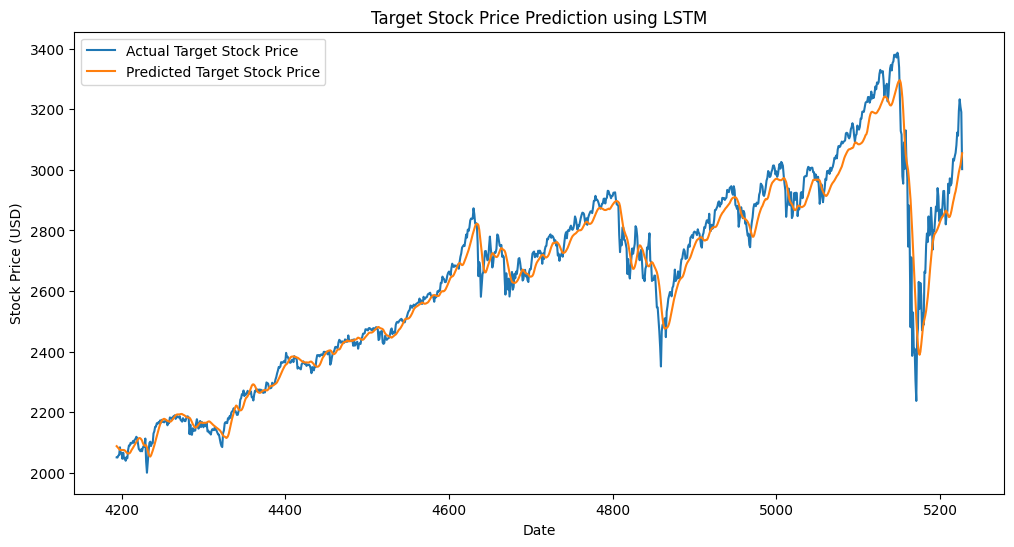

RMSE: 61.1482
MAE: 41.6802
MAPE: 1.5289%


In [46]:


scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

target_scaled = scaler_y.fit_transform(target)
features_scaled = scaler_X.fit_transform(features)

def create_dataset(features, target):
    X, y = [], []
    for i in range(len(features) - 60):
        X_seq = features[i:(i + 60), :]
        y_seq = target[i + 60]
        X.append(X_seq)
        y.append(y_seq)
    return np.array(X), np.array(y)

X, y = create_dataset(features_scaled, target_scaled)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=10)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32)

# Predictions
predictions = model.predict(X_test)

# Inverse transform the predictions
predictions = scaler_y.inverse_transform(predictions)

# Inverse transform the target
y_test = scaler_y.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Target Stock Price')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted Target Stock Price')
plt.title('Target Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Calculate the RMSE (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse:.4f}')

# Calculate the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae:.4f}')

# Calculate the Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, predictions)
print(f'MAPE: {mape:.4f}%')
